# Homework 10

## Question 1

In [3]:
import pandas as pd
import numpy as np

# We parse edible to True and poisonous to False
mushroomColumn = ['Type', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root','stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type','spore-print-color', 'population', 'habitat']
mushroomData = pd.read_csv('mushroom/agaricus-lepiota.data', engine='python', skiprows=9, skipfooter=2, names=mushroomColumn)
mushroomData['Type'] = mushroomData['Type'] == 'e'
mushroomData = pd.get_dummies(mushroomData, columns=mushroomData.columns[1:])
randomMask = np.random.rand(len(mushroomData)) < 0.8
mushroomFitData = mushroomData[randomMask]
mushroomTestData = mushroomData[~randomMask]
mushroomData.head()

,Type,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,True,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,True,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,True,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,False,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


Actual,False,True
Result,,
False,798,0
True,0,781


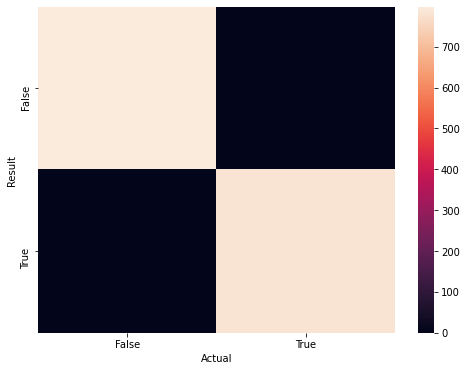

In [4]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
sns.set_palette('bright')
mushroomRFC = RandomForestClassifier()
mushroomRFC.fit(mushroomFitData.iloc[:, 1:], mushroomFitData.iloc[:,0])
mushroomRFC_predictResult = mushroomRFC.predict(mushroomTestData.iloc[:, 1:])
mushroomRFC_actualResult = mushroomTestData.iloc[:, 0]
mushroomRFC_ConfusionMatrix = pd.crosstab(mushroomRFC_predictResult, mushroomRFC_actualResult,\
                                      rownames=['Result'], colnames=['Actual'])
display(mushroomRFC_ConfusionMatrix)
plt.figure(figsize=(8,6)); sns.heatmap(mushroomRFC_ConfusionMatrix); plt.show()

## Question 2

In [5]:
eegColumn = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'eyeDetection']
eegData = pd.read_csv('eeg/EEG Eye State.arff', skiprows=19, names=eegColumn)
eegRandomMask = np.random.rand(len(eegData)) < 0.8
eegFitData = eegData[eegRandomMask]
eegTestData = eegData[~eegRandomMask]
eegData.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


actual,0,1
predict,,
0,1390,268
1,214,1124


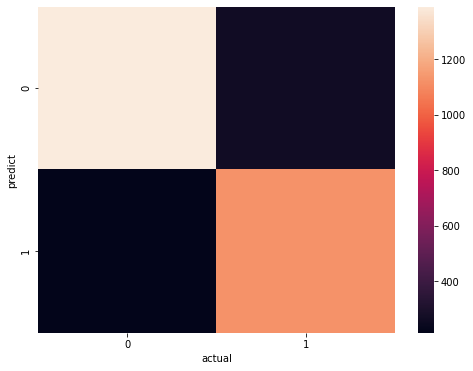

'The accuracy of Decision Tree Module is 0.8391188251001335'

In [6]:
from sklearn.tree import DecisionTreeClassifier
eegDTC = DecisionTreeClassifier(max_depth=50)
eegDTC.fit(eegFitData.iloc[:, :14], eegFitData.iloc[:, 14])
eegDTC_predictResult = eegDTC.predict(eegTestData.iloc[:, :14])
eegDTC_actualResult = eegTestData.iloc[:,14]
eegDTC_confusionMatrix = pd.crosstab(eegDTC_predictResult, eegDTC_actualResult,\
                                     rownames=['predict'], colnames=['actual'])
display(eegDTC_confusionMatrix)
plt.figure(figsize=(8, 6)); sns.heatmap(eegDTC_confusionMatrix); plt.show()
eegDTC_accuracy = (eegDTC_confusionMatrix.iloc[0, 0] + eegDTC_confusionMatrix.iloc[1, 1]) / \
    (eegDTC_confusionMatrix.iloc[0, 0] + eegDTC_confusionMatrix.iloc[1, 1] + eegDTC_confusionMatrix.iloc[0, 1] + eegDTC_confusionMatrix.iloc[1, 0])
display(f'The accuracy of Decision Tree Module is {eegDTC_accuracy}')

actual,0,1
predict,,
0,1546,149
1,58,1243


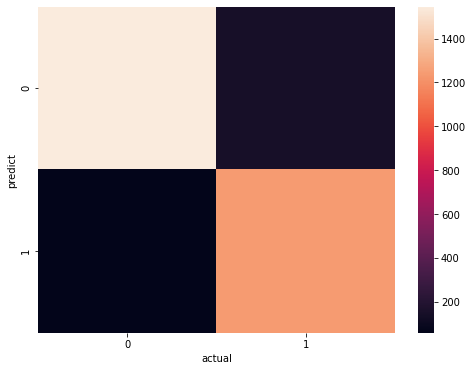

'The accuracy of Random Forest Module is 0.9309078771695594'

In [7]:
from sklearn.ensemble import RandomForestClassifier
eegRFC = RandomForestClassifier(n_estimators=100, max_depth=50)
eegRFC.fit(eegFitData.iloc[:, :-1], eegFitData.iloc[:, -1])
eegRFC_predictResult = eegRFC.predict(eegTestData.iloc[:, :-1])
eegRFC_actualResult = eegTestData.iloc[:, -1]
eegRFC_confusionMatrix = pd.crosstab(eegRFC_predictResult, eegRFC_actualResult,\
                                    rownames=['predict'], colnames=['actual'])
display(eegRFC_confusionMatrix)
plt.figure(figsize=(8, 6)); sns.heatmap(eegRFC_confusionMatrix); plt.show()
eegRFC_accuracy = (eegRFC_confusionMatrix.iloc[0, 0] + eegRFC_confusionMatrix.iloc[1, 1]) / \
    (eegRFC_confusionMatrix.iloc[0, 0] + eegRFC_confusionMatrix.iloc[1, 1] + eegRFC_confusionMatrix.iloc[0, 1] +eegRFC_confusionMatrix.iloc[1, 0])
display(f'The accuracy of Random Forest Module is {eegRFC_accuracy}')

In [8]:
for i in range(50, 101, 5):
    eegDTC = DecisionTreeClassifier(max_depth=i)
    eegDTC.fit(eegFitData.iloc[:, :14], eegFitData.iloc[:, 14])
    eegDTC_predictResult = eegDTC.predict(eegTestData.iloc[:, :14])
    eegDTC_actualResult = eegTestData.iloc[:,14]
    eegDTC_confusionMatrix = pd.crosstab(eegDTC_predictResult, eegDTC_actualResult,\
                                         rownames=['predict'], colnames=['actual'])
    eegDTC_accuracy = (eegDTC_confusionMatrix.iloc[0, 0] + eegDTC_confusionMatrix.iloc[1, 1]) / \
        (eegDTC_confusionMatrix.iloc[0, 0] + eegDTC_confusionMatrix.iloc[1, 1] + eegDTC_confusionMatrix.iloc[0, 1] + eegDTC_confusionMatrix.iloc[1, 0])
    print(f'Depth {i} has accuracy {round(eegDTC_accuracy, 4)}')

Depth 50 has accuracy 0.8408
Depth 55 has accuracy 0.8354
Depth 60 has accuracy 0.8374
Depth 65 has accuracy 0.8418
Depth 70 has accuracy 0.8435
Depth 75 has accuracy 0.8435
Depth 80 has accuracy 0.8381
Depth 85 has accuracy 0.8415
Depth 90 has accuracy 0.8391
Depth 95 has accuracy 0.8378
Depth 100 has accuracy 0.8415


## Question 3

In [10]:
habermanData = pd.read_csv('haberman/haberman.data', names=['age', 'operation_year', 'num_positive_axillary_nodes', 'status'])
habermanRandomMask = np.random.rand(len(habermanData)) < 0.8
habermanFitData = habermanData[habermanRandomMask]
habermanTestData = habermanData[~habermanRandomMask]
habermanData.head()

,age,operation_year,num_positive_axillary_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
# for the sake of coding force we write a function here
def conductFit(fitModule, fitData, fitClass, testData, testClass):
    fitModule.fit(fitData, fitClass)
    predictClass = fitModule.predict(testData)
    confusionMatrix = pd.crosstab(predictClass, testClass, rownames=['predict'], colnames=['actual'])
    display(confusionMatrix)
    plt.figure(figsize=(8, 6)); sns.heatmap(confusionMatrix); plt.show()
    accuracy = (confusionMatrix.iloc[0,0] + confusionMatrix.iloc[1,1]) / (confusionMatrix.iloc[0,0] + confusionMatrix.iloc[1,1] + confusionMatrix.iloc[0,1] + confusionMatrix.iloc[1,0])
    display(f'The accuracy is {accuracy}')

actual,1,2
predict,,
1,37,16
2,7,6


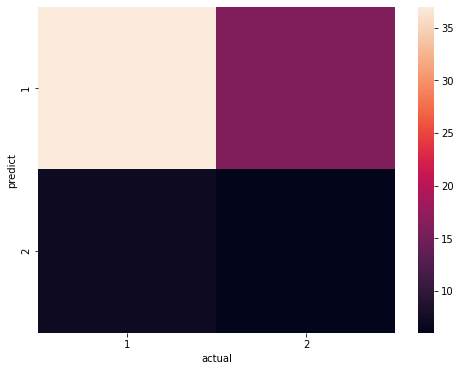

'The accuracy is 0.6515151515151515'

In [12]:
from IPython.display import display, HTML
display(HTML('<h2>Using Decision Tree Module</h2>'))
conductFit(DecisionTreeClassifier(max_depth=50),\
           habermanFitData.iloc[:, :-1], habermanFitData.iloc[:, -1], \
          habermanTestData.iloc[:, :-1], habermanTestData.iloc[:, -1])

actual,1,2
predict,,
1,42,15
2,2,7


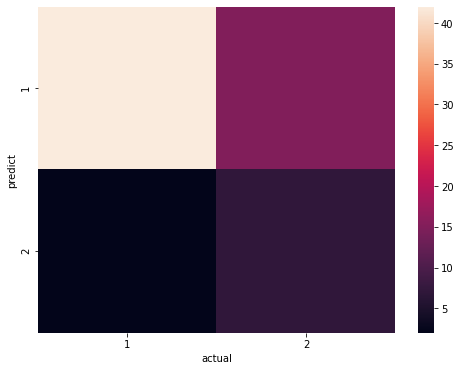

'The accuracy is 0.7424242424242424'

In [13]:
display(HTML('<h2>Using Random Forest Module</h2>'))
conductFit(RandomForestClassifier(max_depth=50),\
           habermanFitData.iloc[:, :-1], habermanFitData.iloc[:, -1], \
          habermanTestData.iloc[:, :-1], habermanTestData.iloc[:, -1])

## Question 4

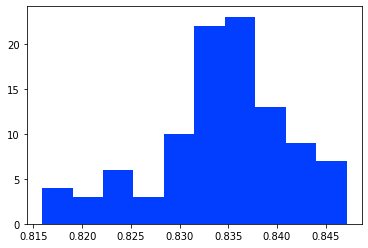

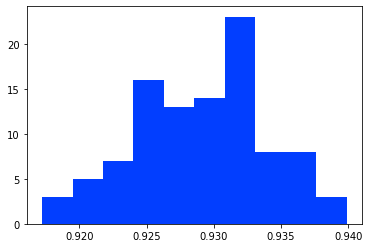

In [15]:
def conductFitTest(fitModule, fitData, fitClass, testData, testClass):
    fitModule.fit(fitData, fitClass)
    predictClass = fitModule.predict(testData)
    confusionMatrix = pd.crosstab(predictClass, testClass, rownames=['predict'], colnames=['actual'])
    accuracy = (confusionMatrix.iloc[0,0] + confusionMatrix.iloc[1,1]) / (confusionMatrix.iloc[0,0] + confusionMatrix.iloc[1,1] + confusionMatrix.iloc[0,1] + confusionMatrix.iloc[1,0])
    return accuracy

DT_accuracy = []
RF_accuracy = []

for i in range(100):
    eegRandomMask = np.random.rand(len(eegData)) < 0.8
    eegFitData = eegData[eegRandomMask]
    eegTestData = eegData[~eegRandomMask]
    dt = conductFitTest(DecisionTreeClassifier(max_depth=50),\
                        eegFitData.iloc[:, :14], eegFitData.iloc[:, 14],\
                        eegTestData.iloc[:, :14], eegTestData.iloc[:, 14],)
    rf = conductFitTest(RandomForestClassifier(n_estimators=100, max_depth=50),\
                        eegFitData.iloc[:, :14], eegFitData.iloc[:, 14],\
                        eegTestData.iloc[:, :14], eegTestData.iloc[:, 14],)
    DT_accuracy.append(dt)
    RF_accuracy.append(rf)

plt.hist(DT_accuracy)
plt.show()

plt.hist(RF_accuracy)
plt.show()